<a href="https://colab.research.google.com/github/Vincent-Tiono/colab_exercise/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [5]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.1MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.77MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.8MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.79MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

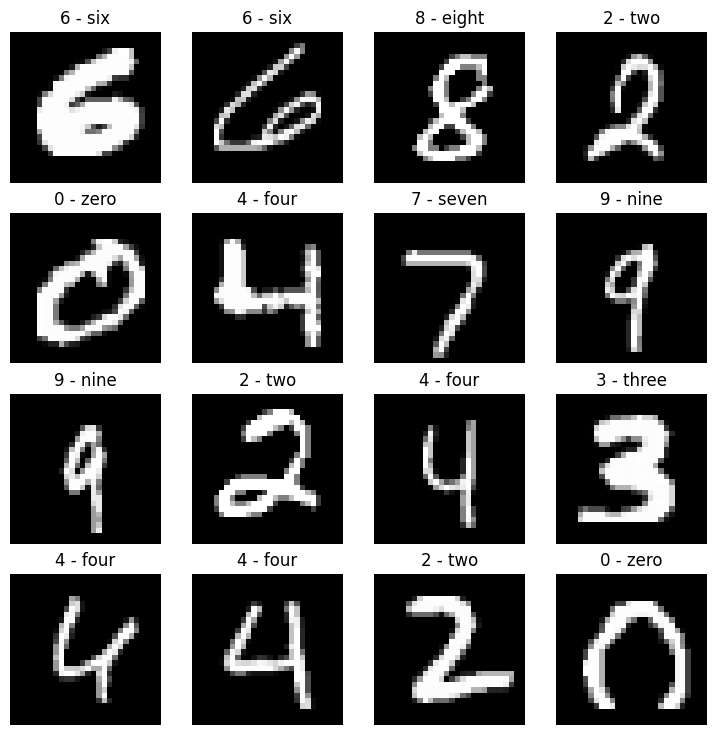

In [8]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
class MNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    x = self.block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    return x

In [11]:
torch.manual_seed(42)
model_1 = MNISTModel(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_names)).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Time for training on {device}: {total_time} seconds")
  return total_time

In [13]:
import requests
from pathlib import Path

request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(request.content)

In [14]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [42]:
# Train on GPU

torch.manual_seed(42)
start_time = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
  model_1.train()
  train_loss = 0
  train_acc = 0
  for X, y in train_dataloader:
    X, y = X.to(device), y.to(device)
    train_pred = model_1(X)

    loss = loss_fn(train_pred, y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y,
                             y_pred=train_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  model_1.eval()
  with torch.inference_mode():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}%")

end_time = timer()

gpu_time = print_train_time(start=start_time,
                            end=end_time,
                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 0.3356 | Train Acc: 88.7417% | Test Loss: 0.0736 | Test Acc: 97.7137%
Epoch: 2 | Train Loss: 0.0822 | Train Acc: 97.4367% | Test Loss: 0.0660 | Test Acc: 97.9533%
Epoch: 3 | Train Loss: 0.0644 | Train Acc: 97.9700% | Test Loss: 0.0595 | Test Acc: 98.0431%
Epoch: 4 | Train Loss: 0.0559 | Train Acc: 98.2217% | Test Loss: 0.0614 | Test Acc: 97.9233%
Epoch: 5 | Train Loss: 0.0498 | Train Acc: 98.4233% | Test Loss: 0.0468 | Test Acc: 98.3926%
Time for training on cpu: 288.9816750629998 seconds


In [15]:
model_1 = model_1.to('cpu')

In [16]:
next(model_1.parameters()).device

device(type='cpu')

In [37]:
# Train on CPU

torch.manual_seed(42)
start_time_cpu = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
  model_1.train()
  train_loss = 0
  train_acc = 0
  for X, y in train_dataloader:
    X, y = X.to('cpu'), y.to('cpu')
    train_pred = model_1(X)

    loss = loss_fn(train_pred, y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y,
                             y_pred=train_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  model_1.eval()
  with torch.inference_mode():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to('cpu'), y_test.to('cpu')
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}%")

end_time_cpu = timer()

gpu_time = print_train_time(start=start_time_cpu,
                            end=end_time_cpu,
                            device='cpu')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 0.0439 | Train Acc: 98.6333% | Test Loss: 0.0459 | Test Acc: 98.5523%
Epoch: 2 | Train Loss: 0.0397 | Train Acc: 98.7650% | Test Loss: 0.0429 | Test Acc: 98.5224%
Epoch: 3 | Train Loss: 0.0367 | Train Acc: 98.8700% | Test Loss: 0.0451 | Test Acc: 98.4924%
Epoch: 4 | Train Loss: 0.0348 | Train Acc: 98.8767% | Test Loss: 0.0477 | Test Acc: 98.5323%
Epoch: 5 | Train Loss: 0.0331 | Train Acc: 98.9450% | Test Loss: 0.0392 | Test Acc: 98.6322%
Time for training on cpu: 172.75491287099976 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [50]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [51]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [52]:
sample.shape

torch.Size([1, 28, 28])

In [53]:
sample.unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [78]:
model_1.eval()
pred_probs = []
with torch.inference_mode():
  for sample in test_samples:
    sample = sample.unsqueeze(dim=0).to(device)
    pred_logit = model_1(sample)
    pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
    pred_probs.append(pred_prob.cpu())
pred_probs = torch.stack(pred_probs)

In [79]:
pred_probs.shape

torch.Size([9, 10])

In [80]:
pred_labels = pred_probs.argmax(dim=1)
pred_labels

tensor([3, 6, 1, 2, 1, 3, 1, 9, 7])

In [56]:
test_labels

[3, 6, 1, 2, 1, 3, 1, 9, 7]

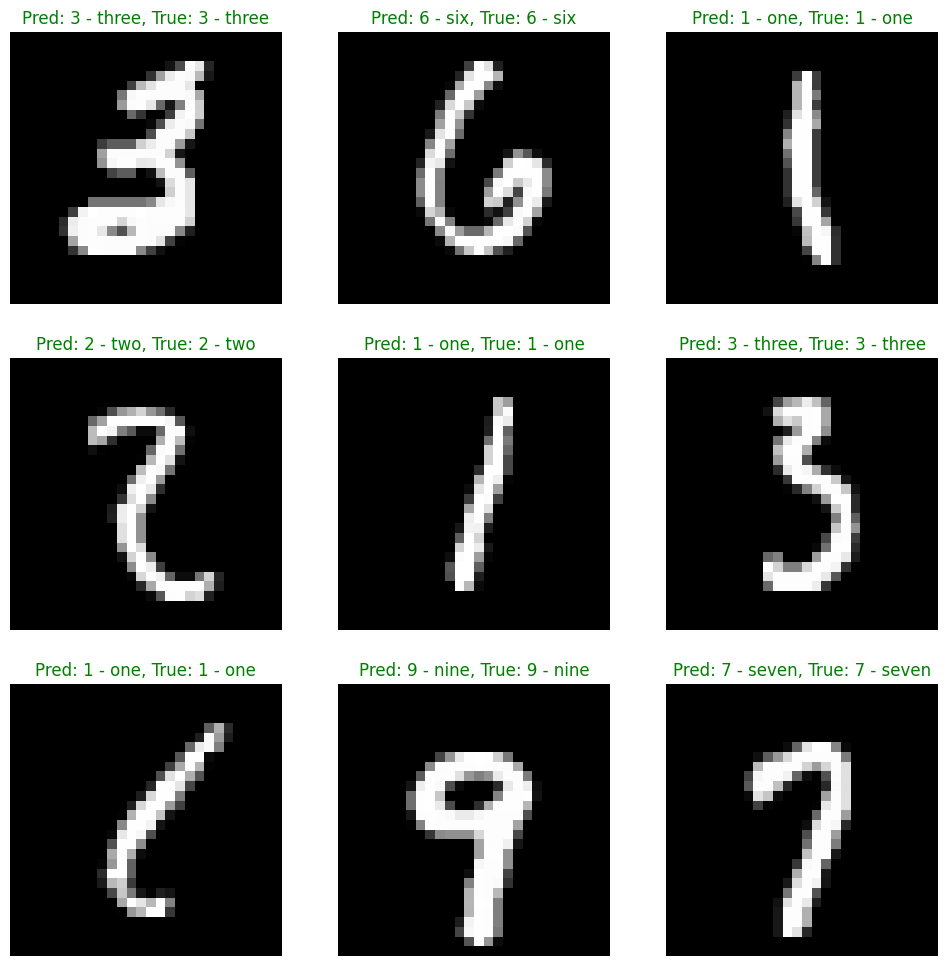

In [67]:
fig = plt.figure(figsize=(12,12))
rows, cols = 3, 3
for i, sample in enumerate(test_samples):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = class_names[pred_labels[i]]
  true_label = class_names[test_labels[i]]
  if pred_label == true_label:
    c = 'g'
  else:
    c = 'r'
  plt.title(f"Pred: {pred_label}, True: {true_label}", c=c)
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [68]:
import mlxtend

In [70]:
model_1.eval()
test_labels = []
with torch.inference_mode():
  for sample, label in tqdm(test_dataloader, desc="Making predictions..."):
    sample, label = sample.to(device), label.to(device)
    pred_logit = model_1(sample)
    pred_label = pred_logit.argmax(dim=1)
    test_labels.append(pred_label)
test_labels = torch.cat(test_labels)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [81]:
!pip install torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 776.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [83]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

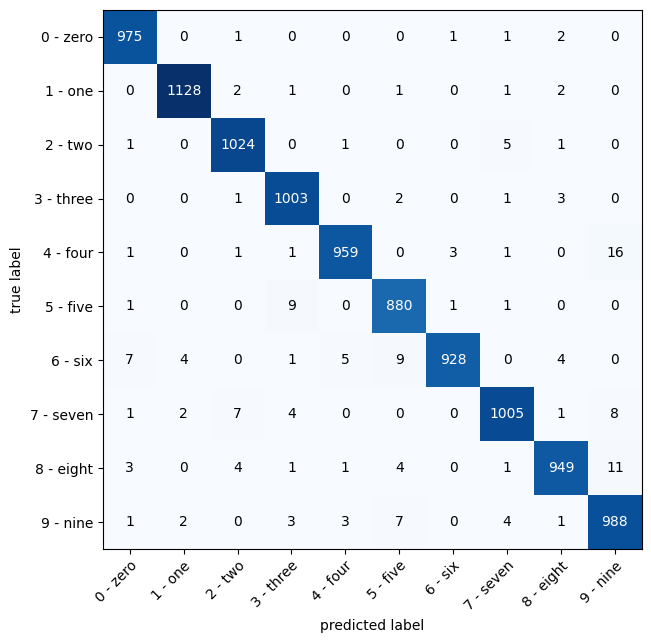

In [84]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=test_labels, target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [88]:
model_conv = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=20,
                       stride=1,
                       padding=1)
sample = torch.rand(size=(1,3,64,64))
output = model_conv(sample)
output.shape

torch.Size([1, 10, 47, 47])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?